In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
# Use the Base class to reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# inspect columns in measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# inspect columns in station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


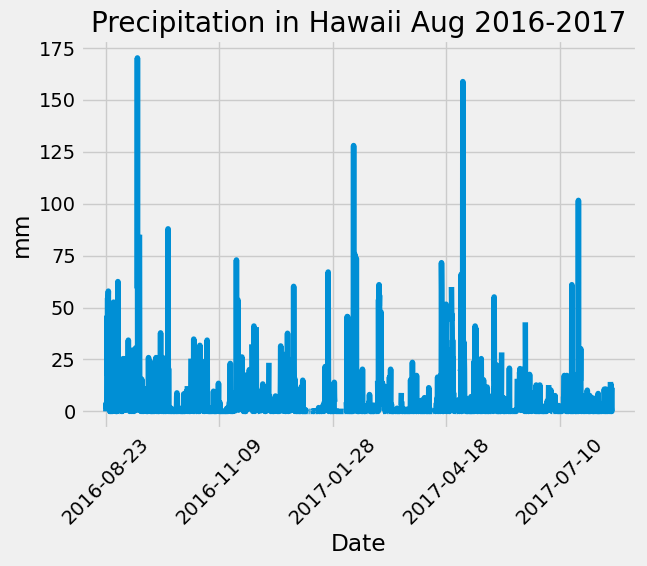

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
start_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='precipitation', legend=False) 
plt.xlabel('Date')
plt.ylabel('mm')
plt.title('Precipitation in Hawaii Aug 2016-2017')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Get a list of unique stations
stations = session.query(measurement.station).distinct().all()

# Count the entries for each station
station_counts = []
for station, in stations:
    count = session.query(measurement).filter(measurement.station == station).count()
    station_counts.append((station, count))

# Sort the stations by count in descending order
station_counts.sort(key=lambda x: x[1], reverse=True)

# print results
for station, count in station_counts:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


# Station USC00519281 is the most active station.

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[(12.2, 29.4, 22.035822510822513)]

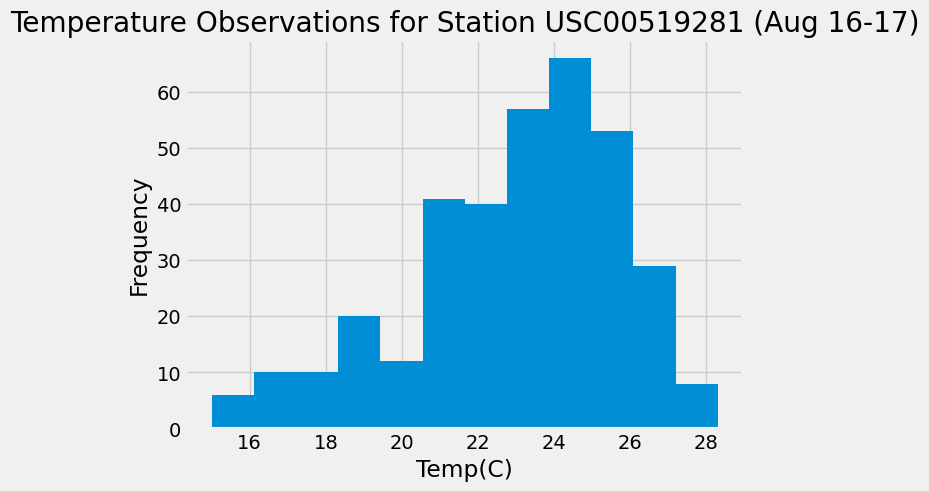

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query to produce temperature data
temp_data = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>='2016-08-23').all()

# Convert to dataframe
temp_df = pd.DataFrame(temp_data, columns=['temperature'])

# Plot a histogram using the DataFrame
temp_df.plot(kind='hist', y='temperature', bins=12, legend=False)
plt.xlabel('Temp(C)')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Station USC00519281 (Aug 16-17)')
plt.show()

# Close Session

In [36]:
# Close Session
session.close()
